In [1]:
#clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [6]:
df.shape

(3999, 12)

In [7]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [11]:
#missing values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
#duplicates
df.duplicated().sum()

np.int64(0)

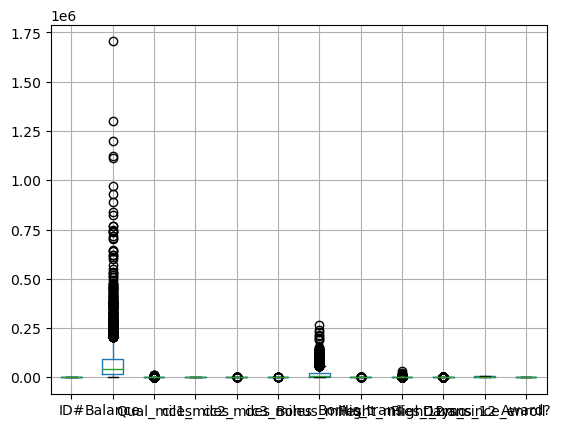

In [13]:
df.boxplot()
plt.show()

In [14]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

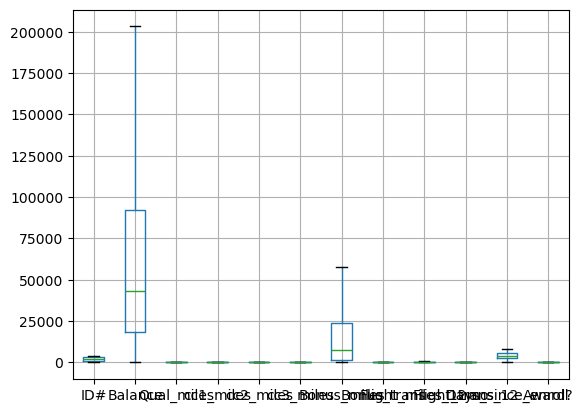

In [15]:
df.boxplot()
plt.show()

In [16]:
#multiple visualizaation

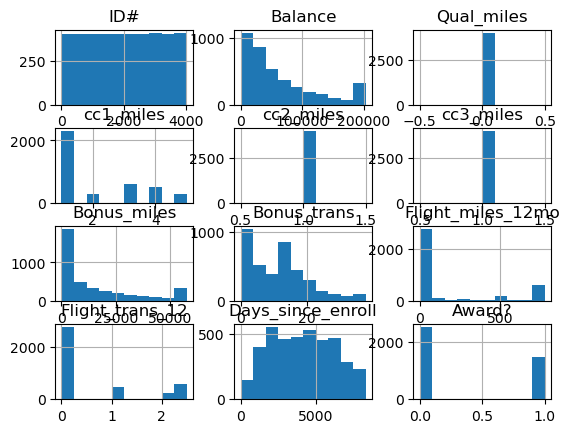

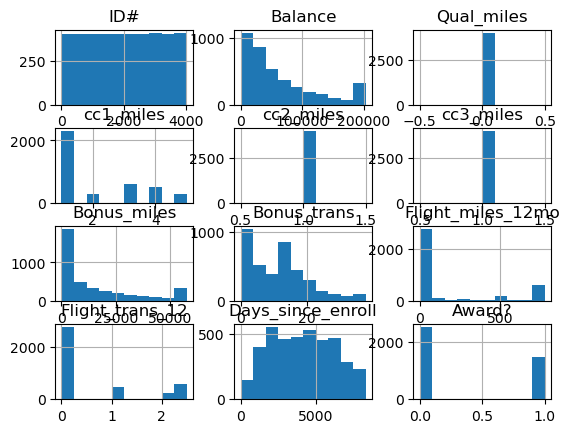

In [18]:
df.hist()
plt.show()

In [19]:
corr=df.corr()
corr

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.269374,NaN,-0.224465,NaN,NaN,-0.210868,-0.156118,-0.083917,-0.082887,-0.964988,-0.177901
Balance,-0.269374,1.000000,NaN,0.446510,NaN,NaN,0.494422,0.409017,0.297045,0.295565,0.286143,0.170678
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,-0.224465,0.446510,NaN,1.000000,NaN,NaN,0.912531,0.627786,0.098786,0.087618,0.230849,0.335457
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,-0.210868,0.494422,NaN,0.912531,NaN,NaN,1.000000,0.663558,0.205801,0.193669,0.217320,0.394061
Bonus_trans,-0.156118,0.409017,NaN,0.627786,NaN,NaN,0.663558,1.000000,0.310543,0.308518,0.170308,0.337444
Flight_miles_12mo,-0.083917,0.297045,NaN,0.098786,NaN,NaN,0.205801,0.310543,1.000000,0.942734,0.095019,0.293119
Flight_trans_12,-0.082887,0.295565,NaN,0.087618,NaN,NaN,0.193669,0.308518,0.942734,1.000000,0.091898,0.300085


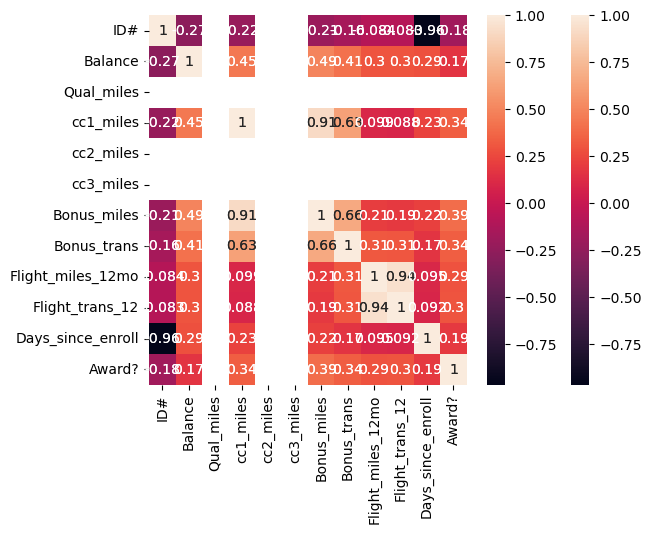

In [21]:
sns.heatmap(corr,annot=True)
plt.show()

In [26]:
features=df.drop(columns=['ID#','Qual_miles'])


In [27]:
std_sca=StandardScaler()
features=pd.DataFrame(std_sca.fit_transform(features),columns=features.columns)
features.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.607258,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919
1,-0.758947,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919
2,-0.382070,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919
3,-0.835106,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919
4,0.579265,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918


In [28]:
#Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.

In [29]:
kmeans=KMeans(n_clusters=6)
cluster=kmeans.fit(features)
np.unique(cluster.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [30]:
df['cluster']= cluster.labels_
df[df.cluster==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0,1
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0,1
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0,1
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0,1
5,6,16420.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,2345,417.0,0.0,1,1.0,1.0,3000.0,1.0,0.0,0.0,3670,1,1
2381,2399,46876.0,0.0,1,1.0,1.0,9680.0,7.0,0.0,0.0,3498,1,1
2383,2401,59895.0,0.0,1,1.0,1.0,10500.0,4.0,0.0,0.0,3497,1,1
2504,2523,142810.0,0.0,1,1.0,1.0,8000.0,4.0,0.0,0.0,3049,1,1


In [32]:
#dbscan

In [33]:
from sklearn.cluster import DBSCAN

In [35]:
labels=DBSCAN(eps=0.9,min_samples=9).fit(features).labels_

In [36]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [37]:
#Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.



In [38]:
#elbow curve
kmeans.inertia_

12447.032264785483

In [39]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
print(inertia)

[31991.999999999993, 22258.92049647019, 17645.553414692848, 15198.321703363139, 13877.884965610348, 12543.937399729177, 11794.105009151737, 10667.784946495156, 10265.13731647076, 9670.024387228164]


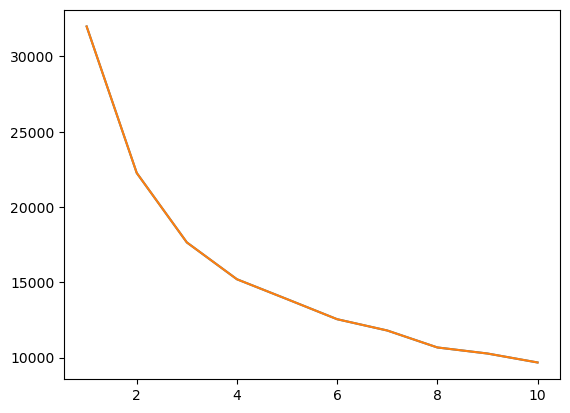

In [41]:
plt.plot(range(1,11) ,inertia)
plt.show()

In [43]:
#DBSCAN (e.g., epsilon, minPts)

In [44]:
eps=eps= [0.8,1.0,1.1,1.2,1.3,1.4,0.5]
min_nodes=range(1,11)

In [46]:
output=[]
for i in eps:
    for j in min_nodes:
        labels= DBSCAN(eps=i,min_samples=j).fit(features).labels_
        score=silhouette_score(features,labels)
        output.append([i,j,score])
print(output)

[[0.8, 1, -0.232474207442323], [0.8, 2, -0.18536227123257434], [0.8, 3, -0.1203624955135341], [0.8, 4, -0.1045484210729143], [0.8, 5, -0.10270926840590908], [0.8, 6, -0.11516655382180661], [0.8, 7, -0.11577534629440217], [0.8, 8, -0.10519026911628632], [0.8, 9, -0.059561083088103976], [0.8, 10, -0.10697665626761568], [1.0, 1, -0.21177111734958023], [1.0, 2, -0.07605639145077796], [1.0, 3, -0.002992347464574999], [1.0, 4, 0.0019871175063671683], [1.0, 5, -0.008994802446905354], [1.0, 6, 0.0063533920717189435], [1.0, 7, -0.02031923778992716], [1.0, 8, -0.019349098640253533], [1.0, 9, -0.03630569855927806], [1.0, 10, -0.036623939669573585], [1.1, 1, -0.2675915495141115], [1.1, 2, -0.1676645688315142], [1.1, 3, -0.09552495826911936], [1.1, 4, -0.013770862968814012], [1.1, 5, 0.07526521902954217], [1.1, 6, 0.08420433604888129], [1.1, 7, 0.12385001056165997], [1.1, 8, 0.1271207259681684], [1.1, 9, 0.1640868077702208], [1.1, 10, -0.03391947667416729], [1.2, 1, -0.2322413609272366], [1.2, 2, 0

In [47]:
a=pd.DataFrame(output,columns=['eps','min_node','score'])
score=a.loc[:,'score'].max()
score

0.209767553178801

In [48]:
a[a.score==score]

,eps,min_node,score
54,1.4,5,0.209768


In [49]:
#implementation with new parameters

In [50]:
kmeans= KMeans(n_clusters=4)
Cluster= kmeans.fit(features)
np.unique(Cluster.labels_)

array([0, 1, 2, 3], dtype=int32)

In [51]:
df['Cluster']= Cluster.labels_
df[df.Cluster==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,Cluster
7,8,20856.00,0.0,1,1.0,1.0,5250.0,4.0,250.0,1.0,6938,1,1,2
21,22,185681.00,0.0,1,1.0,1.0,13300.0,16.0,777.5,2.5,6896,1,4,2
22,23,20584.00,0.0,1,1.0,1.0,3450.0,11.0,777.5,2.5,6884,0,4,2
24,25,203218.75,0.0,1,1.0,1.0,4025.0,21.0,700.0,2.5,7932,0,4,2
26,27,18521.00,0.0,1,1.0,1.0,1227.0,2.0,777.5,2.0,7917,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,3957,76595.00,0.0,1,1.0,1.0,10577.0,2.0,777.5,1.0,1515,0,4,2
3946,3969,139032.00,0.0,3,1.0,1.0,19565.0,17.0,777.5,2.5,1481,0,4,2
3950,3973,59650.00,0.0,1,1.0,1.0,5050.0,16.0,777.5,2.5,1476,0,4,2
3967,3990,26504.00,0.0,2,1.0,1.0,10599.0,29.0,777.5,2.5,1445,0,4,2


In [52]:
Labels= DBSCAN(eps=1.4,min_samples=5).fit(features).labels_
np.unique(Labels)

array([-1,  0,  1])

In [53]:
#cluster analysisand interpretation

From the K-Means algorithm, the dataset was partitioned into distinct customer groups based on travel and mileage behavior.

For DBSCAN, the algorithm produced a few meaningful clusters but also identified several data points as noise (label -1). This indicates that while DBSCAN can capture dense customer groups, it is sensitive to parameters like eps and min_samples.

Compared to K-Means, DBSCAN was less effective at grouping all records cleanly, possibly due to variations in feature density across the dataset.

In [54]:
#visualization

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(features)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [56]:
pca=PCA(n_components=2)
X_pca = pca.fit_transform(features)

In [57]:
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

In [58]:
#Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

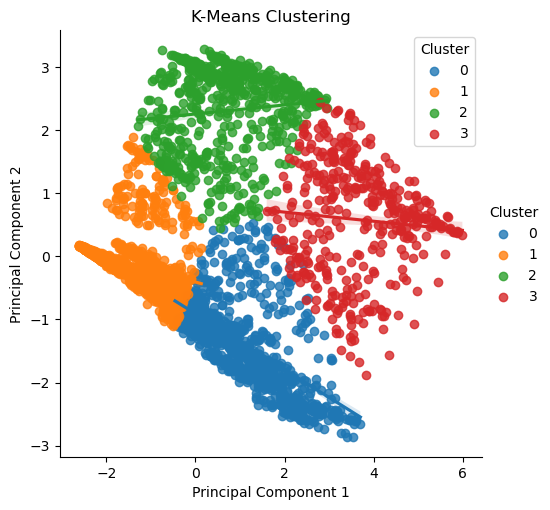

In [59]:
pca_df['Cluster'] = Cluster.labels_
sns.lmplot(data=pca_df, x='principal component 1', y='principal component 2', hue='Cluster')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

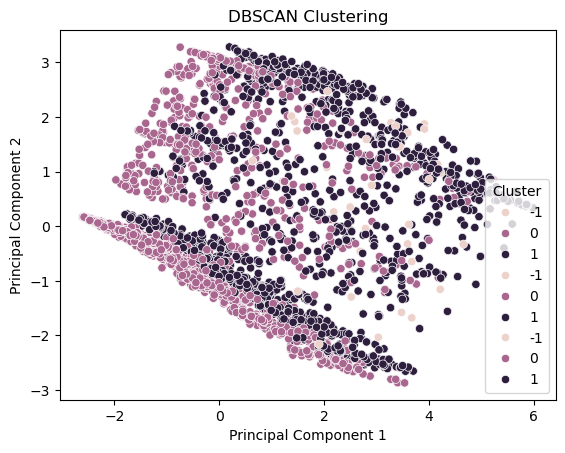

In [62]:
#  DBSCAN Visualization
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
pca_df['Cluster'] = Labels
sns.scatterplot(data=pca_df, x='principal component 1', y='principal component 2', hue='Cluster')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()